# Oppenheimer  <br>
<p><img src="dataset/Cover_oppenheimer.jpg" alt="Cover" width="700px"></p>




### Importing Required Libraries

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import *
from wordcloud import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Acquire
<pre><b> • Explore problem<b> </pre>
<pre><b> • Identify data<b> </pre>
<pre><b> • Import data<b> </pre>

### **Data**
#### <pre><b>• Import and read the data</pre>

In [194]:
df=pd.read_csv('dataset/Oppenhimer_Cleaned_Reviews.csv')
df.head()

,text,rating
0,"A challenging watch to be sure, but a worthwhi...",8
1,A brilliantly layered examination of a man thr...,1
2,Nolan delivers a powerfull biopic that shows t...,1
3,A Masterpiecemohameddawoud-2601919 July 2023I ...,1
4,And the Oscar goes to...mark-217-30703319 July...,1


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84048 entries, 0 to 84047
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    84048 non-null  object
 1   rating  84048 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


### Prepare
<pre><b> • Explore data<b> </pre>
<pre><b> • Visualize ideas<b> </pre>
<pre><b> • Cleaning data<b> </pre>


In [196]:
df.isna().sum()

text      0
rating    0
dtype: int64

In [197]:
df.duplicated().sum()

82012

In [198]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [199]:
def clean_text(text):
    all_list = [char for char in text if char not in string.punctuation]
    text=''.join(all_list)
    text=text.lower()
    return text   

In [200]:
df['text']=df['text'].apply(clean_text)
stop=stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,text,rating
0,challenging watch sure worthwhile onejeremyurq...,8
1,brilliantly layered examination man throughout...,1
2,nolan delivers powerfull biopic shows dark sid...,1
3,masterpiecemohameddawoud2601919 july 2023i may...,1
4,oscar goes tomark21730703319 july 2023im still...,1


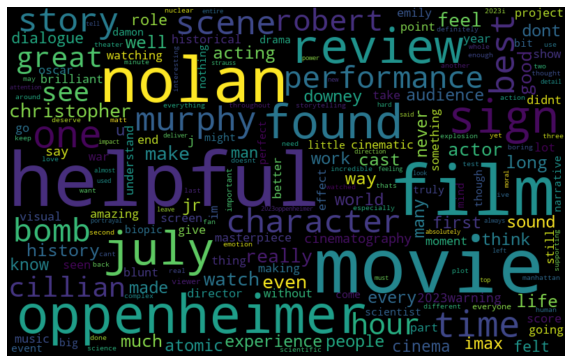

In [201]:
all_words=''.join([word for word in df['text']])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [202]:
unknown_rating=list(string.ascii_uppercase)
for c in unknown_rating: 
    df.drop(df[df['rating']==c].index,inplace=True)

In [203]:
df['rating']=df['rating'].astype(int)

In [204]:
df.describe()

,rating
count,2015.000000
mean,4.074442
std,3.318782
min,1.000000
25%,1.000000
50%,2.000000
75%,7.500000
max,9.000000


In [205]:
l=[]
for i in range(df.shape[0]):
    try:
        if df['rating'][i]>int(df['rating'].describe()['mean']):l.append('High')
        elif df['rating'][i]<int(df['rating'].describe()['mean']):l.append('Low')
        elif df['rating'][i]==int(df['rating'].describe()['mean']):l.append('Mid')
    except:l.append(np.nan);continue
df['class_rating']=l

In [206]:
df.isna().sum()

text               0
rating             0
class_rating    1724
dtype: int64

In [207]:
df.dropna(inplace=True)

In [208]:
df.head()

,text,rating,class_rating
0,challenging watch sure worthwhile onejeremyurq...,8,High
1,brilliantly layered examination man throughout...,1,Low
2,nolan delivers powerfull biopic shows dark sid...,1,Low
3,masterpiecemohameddawoud2601919 july 2023i may...,1,Low
4,oscar goes tomark21730703319 july 2023im still...,1,Low


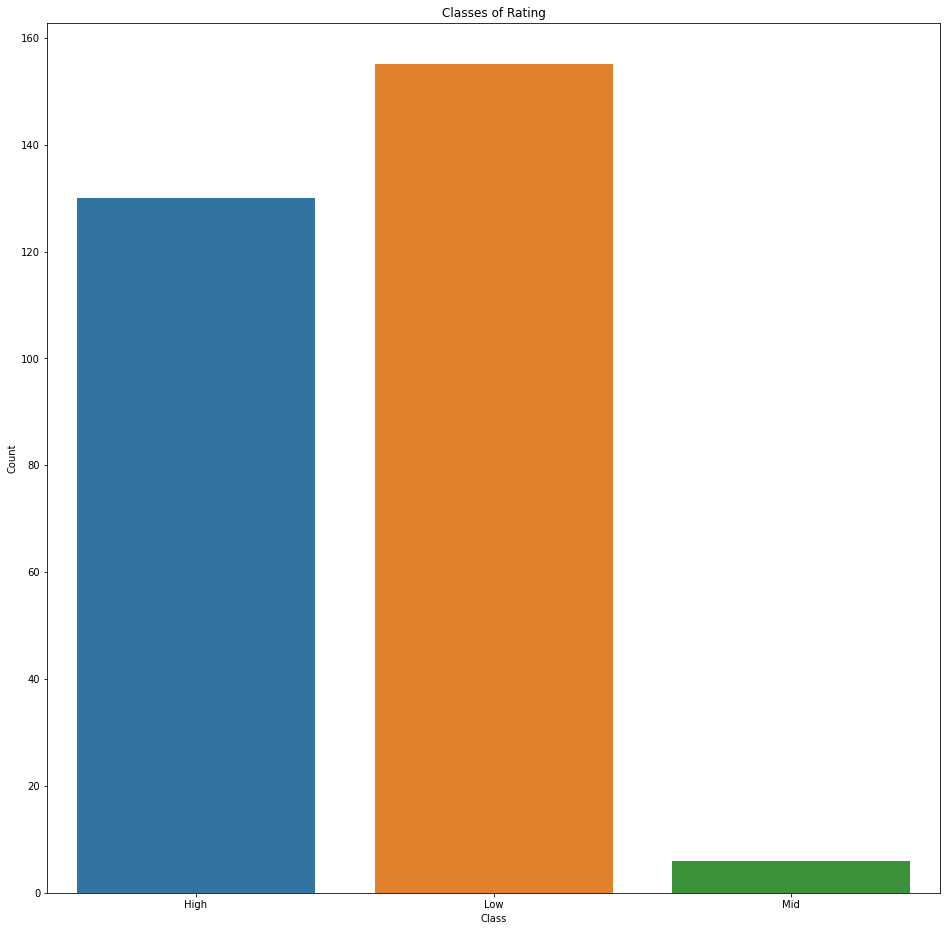

In [209]:
plt.figure(figsize=(16,16))
sns.countplot(df['class_rating'])
plt.xlabel('Class');plt.ylabel('Count');plt.title('Classes of Rating')
plt.show()

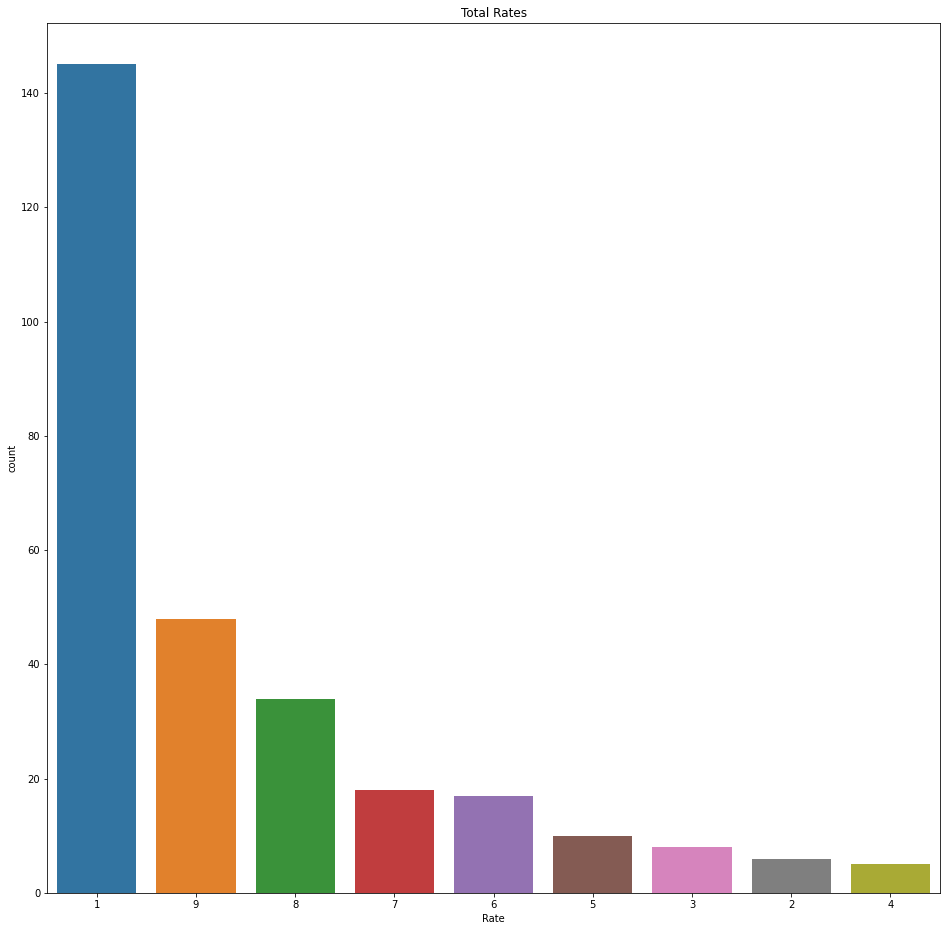

In [234]:
plt.figure(figsize=(16,16))
part_df=df.sort_values('rating',ascending=False)
sns.countplot(x=part_df['rating'],order=df['rating'].value_counts(ascending=False).index)
plt.xlabel('Rate')
plt.title('Total Rates')
plt.show()

In [235]:
df.to_csv('Final.csv')